### Importing Libraries

In [62]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading csv

In [63]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [64]:
df=df.drop('Unnamed: 0',axis=1)

In [65]:
x=df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [66]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

##### Train Test Split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [68]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [69]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [70]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [71]:
model_dt.score(x_test,y_test)

0.7810945273631841

In [72]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.59      0.55      0.57       370

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [73]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
lf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
lf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [81]:
from sklearn import tree



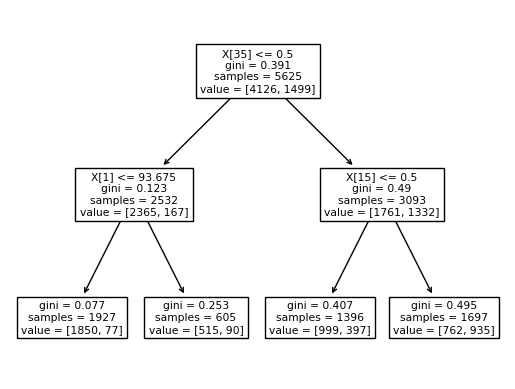

In [82]:
tree.plot_tree(lf);


In [87]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [88]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [100]:
lf1=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=8)

In [101]:

lf1.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=100)

In [102]:
lf1.fit(X_resampled,y_resampled)
yr_predict = lf1.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9291736930860034
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       544
           1       0.85      0.96      0.90       642

    accuracy                           0.89      1186
   macro avg       0.90      0.88      0.88      1186
weighted avg       0.89      0.89      0.88      1186



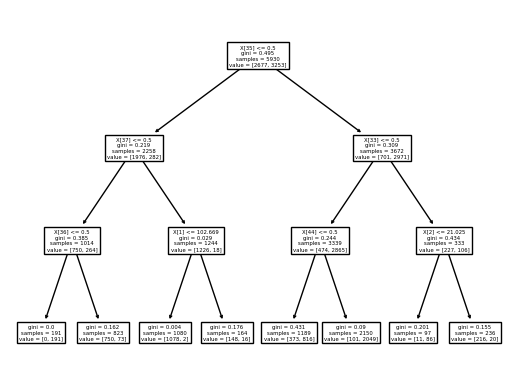

In [103]:
tree.plot_tree(lf1);


In [104]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[435 109]
 [ 27 615]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=4, min_samples_leaf=8)

In [133]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=8, random_state=100)

In [134]:
y_pred=model_rf.predict(x_test)

In [135]:
model_rf.score(x_test,y_test)

0.7860696517412935

In [136]:
len(model_rf.estimators_)


100

[Text(0.5, 0.9, 'OnlineBackup_No internet service <= 0.5\ngini = 0.389\nsamples = 3545\nvalue = [4135, 1490]'),
 Text(0.25, 0.7, 'tenure_group_1 - 12 <= 0.5\ngini = 0.435\nsamples = 2765\nvalue = [2978, 1403]'),
 Text(0.125, 0.5, 'Contract_Month-to-month <= 0.5\ngini = 0.34\nsamples = 1927\nvalue = [2395, 666]'),
 Text(0.0625, 0.3, 'OnlineSecurity_Yes <= 0.5\ngini = 0.158\nsamples = 1034\nvalue = [1482, 140]'),
 Text(0.03125, 0.1, 'gini = 0.221\nsamples = 411\nvalue = [554, 80]'),
 Text(0.09375, 0.1, 'gini = 0.114\nsamples = 623\nvalue = [928, 60]'),
 Text(0.1875, 0.3, 'StreamingMovies_No <= 0.5\ngini = 0.464\nsamples = 893\nvalue = [913, 526]'),
 Text(0.15625, 0.1, 'gini = 0.498\nsamples = 423\nvalue = [356, 311]'),
 Text(0.21875, 0.1, 'gini = 0.402\nsamples = 470\nvalue = [557, 215]'),
 Text(0.375, 0.5, 'InternetService_Fiber optic <= 0.5\ngini = 0.493\nsamples = 838\nvalue = [583, 737]'),
 Text(0.3125, 0.3, 'TotalCharges <= 220.2\ngini = 0.476\nsamples = 370\nvalue = [353, 227]'),
 

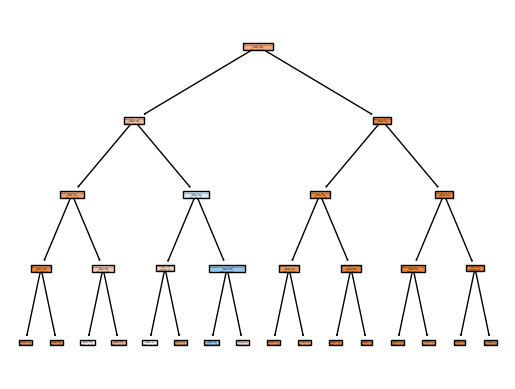

In [137]:
tree.plot_tree(model_rf.estimators_[0], feature_names=x.columns, filled=True)

In [138]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1037
           1       0.66      0.38      0.48       370

    accuracy                           0.79      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.77      0.79      0.76      1407



In [118]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [119]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [120]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [121]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [122]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [123]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [124]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9431239388794567
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       521
           1       0.93      0.97      0.95       657

    accuracy                           0.94      1178
   macro avg       0.95      0.94      0.94      1178
weighted avg       0.94      0.94      0.94      1178



In [125]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[475  46]
 [ 21 636]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [126]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [127]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [128]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [129]:
yr_predict_pca = model.predict(xr_test_pca)

In [130]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [131]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7113752122241087
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       521
           1       0.73      0.77      0.75       657

    accuracy                           0.71      1178
   macro avg       0.71      0.70      0.70      1178
weighted avg       0.71      0.71      0.71      1178

